In [1]:
import numpy as np   # NumPy is used for numerical and array operations in Python
import pandas as pd  # Pandas is used for data manipulation and analysis, providing data structures like DataFrames
import re            # Python's regular expression library to search for a specific pattern in the provided

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  #This sets the maximum column width, maximum number of rows,
                                            # and maximum number of columns to display without truncation or limitation.

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')  # Load the dataset

In [4]:
# This give you the count of duplicate rows in your DataFrame

df.duplicated().sum()

122

In [5]:
df.head(2)   # Load the 1st 2 columns

# focus is on-->areaWithType,additionalRoom,agePossession,furnishDetails,features

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,suncity vatsal valley,gwal pahari,1.38,9650.0,1430.0,Super Built up area 1430(132.85 sq.m.),3,3,2,not available,1.0,East,1 to 5 Year Old,"['Sector 55-56 Metro Station', 'Banjara Market Gurugram', 'Central Plaza Mall', 'Faridabad - Gurgaon Road', 'Badshahpur Sohna Rd Hwy', ""Lingaya's Lalita Devi Institute"", 'Unicosmos School', 'Sushant University', 'Paras Hospitals, Gurgaon', 'Indira Gandhi Intl Airport', 'Gurgaon Railway Station', 'ASF Insignia SEZ']","['3 Wardrobe', '4 Fan', '1 Microwave', '10 Light', '2 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
1,house,independent,sector 25,10.00,37037.0,2700.0,Plot area 300(250.84 sq.m.),5,6,3,"store room,servant room",3.0,North,10+ Year Old,"['Vodafone belvedere towers metro station', 'Dlf phase 2 metro station', 'Dlf phase 3 metro station', 'Indusind bank cyber city metro station', 'Sikandarpur metro station', 'Shri Shiv Shakthi Mandir', 'Jain Bhawan', 'Arya Samaj Mandir', 'Central bank atm teste 001112', 'Central bank ATM', 'Kotak mahindra ATM', 'Citibank ATM', 'Abn amro bank ATM', 'Axis bank ATM', 'Surgi Center Clinic', 'Kailash Nursing Home Gurgaon', 'RBS Dental Clinic', 'Cosmodentz Dental Clinic', 'Uma Sanjeevani Health Centre And Hospital', 'Relief Physiotherapy Clinic', 'Darpan Skin & Mind Clinic', 'Durga Poly Clinic', 'Krishna Family Clinic', 'Guardian', '98.4', 'Religare Wellness', 'Shri Balaji Medical Store', 'DLF Cyber City Phase II', 'Emaar Business Park', 'Standard chartered bank', 'Icici bank', 'Deutsche bank', 'Hsbc bank', 'Kotak mahindra bank', 'Axis bank', 'PVR Cinames', 'Mukesh Dhaba', 'Mc Donalds', ""McDonald's"", 'Food Court', 'The God Father', 'Cantine', 'barrique', 'American Montessori']","['1 Water Purifier', '7 Fan', '1 Exhaust Fan', '6 Geyser', '25 Light', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Park', 'Visitor Parking', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting']"


##1.areaWithType

In [6]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
3098,1.35,1850.0,Super Built up area 2355(218.79 sq.m.)Built Up area: 2100 sq.ft. (195.1 sq.m.)Carpet area: 1850 sq.ft. (171.87 sq.m.)
2752,1.10,2077.0,Super Built up area 2077(192.96 sq.m.)Carpet area: 1600 sq.ft. (148.64 sq.m.)
496,6.00,2700.0,Plot area 300(250.84 sq.m.)
816,0.95,1307.0,Carpet area: 1307 (121.42 sq.m.)
1051,2.80,1867.0,Super Built up area 1828(169.83 sq.m.)


In [7]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [8]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [9]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [10]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [11]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
991,38.00,house,5000.0,Carpet area: 50 (4.65 sq.m.),NaN,NaN,50.00
3430,4.70,flat,6926.0,Super Built up area 6926(643.45 sq.m.),6926.0,NaN,NaN
3090,0.60,flat,650.0,Super Built up area 650(60.39 sq.m.)Carpet area: 596.12 sq.ft. (55.38 sq.m.),650.0,NaN,596.12
824,9.50,house,546.0,Plot area 546(50.73 sq.m.),NaN,NaN,NaN
1402,1.92,flat,2400.0,Super Built up area 2400(222.97 sq.m.),2400.0,NaN,NaN


In [12]:
df.duplicated().sum()

122

In [13]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [14]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
1,10.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
6,5.00,house,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 sq.yards (96.15 sq.m.)Carpet area: 100 sq.yards (83.61 sq.m.),NaN,115.0,100.0
20,1.39,house,1200.0,Plot area 540(50.17 sq.m.)Built Up area: 1450 sq.ft. (134.71 sq.m.)Carpet area: 1200 sq.ft. (111.48 sq.m.),NaN,1450.0,1200.0
31,5.85,house,2214.0,Plot area 246(205.69 sq.m.),NaN,NaN,NaN
32,9.50,house,2844.0,Plot area 316(264.22 sq.m.),NaN,NaN,NaN


In [15]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [16]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [17]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
1,10.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
31,5.85,house,2214.0,Plot area 246(205.69 sq.m.),NaN,NaN,NaN
32,9.50,house,2844.0,Plot area 316(264.22 sq.m.),NaN,NaN,NaN
34,7.25,house,360.0,Plot area 360(33.45 sq.m.),NaN,NaN,NaN
37,NaN,house,NaN,Plot area 520(434.79 sq.m.),NaN,NaN,NaN


In [18]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [19]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [20]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [21]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
1,10.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.00,NaN
31,5.85,house,2214.0,Plot area 246(205.69 sq.m.),NaN,246.00,NaN
32,9.50,house,2844.0,Plot area 316(264.22 sq.m.),NaN,316.00,NaN
34,7.25,house,360.0,Plot area 360(33.45 sq.m.),NaN,360.00,NaN
37,NaN,house,NaN,Plot area 520(434.79 sq.m.),NaN,520.00,NaN
48,5.70,house,5400.0,Plot area 600(501.68 sq.m.),NaN,600.00,NaN
61,2.00,house,1800.0,Plot area 200(167.23 sq.m.),NaN,200.00,NaN
63,50.00,house,36000.0,Plot area 40(33.45 sq.m.),NaN,40.00,NaN
64,70.00,house,68406.0,Plot area 684(63.55 sq.m.),NaN,684.00,NaN
70,3.60,house,2430.0,Plot area 270(225.75 sq.m.),NaN,270.00,NaN


In [22]:
# update the original dataframe
df.update(all_nan_df)

In [23]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [24]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,suncity vatsal valley,gwal pahari,1.38,9650.0,1430.0,Super Built up area 1430(132.85 sq.m.),3,3,2,not available,1.0,East,1 to 5 Year Old,"['Sector 55-56 Metro Station', 'Banjara Market Gurugram', 'Central Plaza Mall', 'Faridabad - Gurgaon Road', 'Badshahpur Sohna Rd Hwy', ""Lingaya's Lalita Devi Institute"", 'Unicosmos School', 'Sushant University', 'Paras Hospitals, Gurgaon', 'Indira Gandhi Intl Airport', 'Gurgaon Railway Station', 'ASF Insignia SEZ']","['3 Wardrobe', '4 Fan', '1 Microwave', '10 Light', '2 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1430.0,NaN,NaN
1,house,independent,sector 25,10.00,37037.0,2700.0,Plot area 300(250.84 sq.m.),5,6,3,"store room,servant room",3.0,North,10+ Year Old,"['Vodafone belvedere towers metro station', 'Dlf phase 2 metro station', 'Dlf phase 3 metro station', 'Indusind bank cyber city metro station', 'Sikandarpur metro station', 'Shri Shiv Shakthi Mandir', 'Jain Bhawan', 'Arya Samaj Mandir', 'Central bank atm teste 001112', 'Central bank ATM', 'Kotak mahindra ATM', 'Citibank ATM', 'Abn amro bank ATM', 'Axis bank ATM', 'Surgi Center Clinic', 'Kailash Nursing Home Gurgaon', 'RBS Dental Clinic', 'Cosmodentz Dental Clinic', 'Uma Sanjeevani Health Centre And Hospital', 'Relief Physiotherapy Clinic', 'Darpan Skin & Mind Clinic', 'Durga Poly Clinic', 'Krishna Family Clinic', 'Guardian', '98.4', 'Religare Wellness', 'Shri Balaji Medical Store', 'DLF Cyber City Phase II', 'Emaar Business Park', 'Standard chartered bank', 'Icici bank', 'Deutsche bank', 'Hsbc bank', 'Kotak mahindra bank', 'Axis bank', 'PVR Cinames', 'Mukesh Dhaba', 'Mc Donalds', ""McDonald's"", 'Food Court', 'The God Father', 'Cantine', 'barrique', 'American Montessori']","['1 Water Purifier', '7 Fan', '1 Exhaust Fan', '6 Geyser', '25 Light', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Park', 'Visitor Parking', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting']",NaN,300.0,NaN
2,flat,signature global city 81,sector 81,0.89,8279.0,1075.0,Carpet area: 1075 (99.87 sq.m.),2,2,2,others,3.0,North,Oct-24,"['Ambience Mall New', 'Dwarka Expressway', 'NH8', ""St. Xavier's High School"", 'Miracles Apollo Cradle', 'Hyatt Regency Gurgaon', 'Nakhrola Stadium']","['2 Wardrobe', '4 Fan', '2 Geyser', '4 Light', '3 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Park']",NaN,NaN,1075.0
3,flat,bestech park view ananda,sector 81,1.40,7734.0,1810.0,Super Built up area 1810(168.15 sq.m.)Carpet area: 1180 sq.ft. (109.63 sq.m.

##1.additionalRoom

In [25]:
df['additionalRoom'].value_counts()

not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
study room,servant room                            99
store room                                         99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
servant room,study room     

In [26]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [27]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
422,not available,0,0,0,0,0
1277,"store room,servant room",0,1,1,0,0
1029,"servant room,store room",0,1,1,0,0
3643,servant room,0,1,0,0,0
387,study room,1,0,0,0,0


In [28]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,suncity vatsal valley,gwal pahari,1.38,9650.0,1430.0,Super Built up area 1430(132.85 sq.m.),3,3,2,not available,1.0,East,1 to 5 Year Old,"['Sector 55-56 Metro Station', 'Banjara Market Gurugram', 'Central Plaza Mall', 'Faridabad - Gurgaon Road', 'Badshahpur Sohna Rd Hwy', ""Lingaya's Lalita Devi Institute"", 'Unicosmos School', 'Sushant University', 'Paras Hospitals, Gurgaon', 'Indira Gandhi Intl Airport', 'Gurgaon Railway Station', 'ASF Insignia SEZ']","['3 Wardrobe', '4 Fan', '1 Microwave', '10 Light', '2 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1430.0,NaN,NaN,0,0,0,0,0
1,house,independent,sector 25,10.00,37037.0,2700.0,Plot area 300(250.84 sq.m.),5,6,3,"store room,servant room",3.0,North,10+ Year Old,"['Vodafone belvedere towers metro station', 'Dlf phase 2 metro station', 'Dlf phase 3 metro station', 'Indusind bank cyber city metro station', 'Sikandarpur metro station', 'Shri Shiv Shakthi Mandir', 'Jain Bhawan', 'Arya Samaj Mandir', 'Central bank atm teste 001112', 'Central bank ATM', 'Kotak mahindra ATM', 'Citibank ATM', 'Abn amro bank ATM', 'Axis bank ATM', 'Surgi Center Clinic', 'Kailash Nursing Home Gurgaon', 'RBS Dental Clinic', 'Cosmodentz Dental Clinic', 'Uma Sanjeevani Health Centre And Hospital', 'Relief Physiotherapy Clinic', 'Darpan Skin & Mind Clinic', 'Durga Poly Clinic', 'Krishna Family Clinic', 'Guardian', '98.4', 'Religare Wellness', 'Shri Balaji Medical Store', 'DLF Cyber City Phase II', 'Emaar Business Park', 'Standard chartered bank', 'Icici bank', 'Deutsche bank', 'Hsbc bank', 'Kotak mahindra bank', 'Axis bank', 'PVR Cinames', 'Mukesh Dhaba', 'Mc Donalds', ""McDonald's"", 'Food Court', 'The God Father', 'Cantine', 'barrique', 'American Montessori']","['1 Water Purifier', '7 Fan', '1 Exhaust Fan', '6 Geyser', '25 Light', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Park', 'Visitor Parking', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting']",NaN,300.0,NaN,0,1,1,0,0
2,flat,signature global city 81,sector 81,0.89,8279.0,1075.0,Carpet area: 1075 (99.87 sq.m.),2,2,2,others,3.0,North,Oct-24,"['Ambience Mall New', 'Dwarka Expressway', 'NH8', ""St. Xavier's High School"", 'Miracles Apollo Cradle', 'Hyatt Regency Gurgaon', 'Nakhrola Stadium']","['2 Wardrobe', '4 Fan', '2 Geyser', '4 Light', '3 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Park']",NaN,NaN,1075.0,0,0,0,0,1
3,flat,bestech park view ananda,sector 81,1.40,7734.0,

##3.agePossession

In [29]:
df['agePossession'].value_counts()

1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec-23                  22
By 2023                 19
By 2024                 17
Dec-24                  16
Mar-24                  14
Jan-24                   8
Oct-24                   8
Dec-25                   7
Jun-24                   7
Aug-23                   7
Nov-23                   5
Sep-23                   4
By 2025                  4
Jul-24                   4
Aug-24                   4
Oct-23                   4
Feb-24                   3
May-24                   3
Nov-24                   3
Jan-25                   3
Sep-25                   2
Oct-25                   2
Mar-25                   2
Jan-26                   2
Aug-25                   2
Jun-27                   2
Jul-25                   2
Apr-26                   2
By 2027                  2
J

In [30]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [31]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [32]:
df['agePossession'].value_counts()

Relatively New        1676
New Property           626
Moderately Old         575
Undefined              484
Old Property           310
Under Construction     132
Name: agePossession, dtype: int64

In [33]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,suncity vatsal valley,gwal pahari,1.38,9650.0,1430.0,Super Built up area 1430(132.85 sq.m.),3,3,2,not available,1.0,East,Relatively New,"['Sector 55-56 Metro Station', 'Banjara Market Gurugram', 'Central Plaza Mall', 'Faridabad - Gurgaon Road', 'Badshahpur Sohna Rd Hwy', ""Lingaya's Lalita Devi Institute"", 'Unicosmos School', 'Sushant University', 'Paras Hospitals, Gurgaon', 'Indira Gandhi Intl Airport', 'Gurgaon Railway Station', 'ASF Insignia SEZ']","['3 Wardrobe', '4 Fan', '1 Microwave', '10 Light', '2 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1430.0,NaN,NaN,0,0,0,0,0
1,house,independent,sector 25,10.00,37037.0,2700.0,Plot area 300(250.84 sq.m.),5,6,3,"store room,servant room",3.0,North,Old Property,"['Vodafone belvedere towers metro station', 'Dlf phase 2 metro station', 'Dlf phase 3 metro station', 'Indusind bank cyber city metro station', 'Sikandarpur metro station', 'Shri Shiv Shakthi Mandir', 'Jain Bhawan', 'Arya Samaj Mandir', 'Central bank atm teste 001112', 'Central bank ATM', 'Kotak mahindra ATM', 'Citibank ATM', 'Abn amro bank ATM', 'Axis bank ATM', 'Surgi Center Clinic', 'Kailash Nursing Home Gurgaon', 'RBS Dental Clinic', 'Cosmodentz Dental Clinic', 'Uma Sanjeevani Health Centre And Hospital', 'Relief Physiotherapy Clinic', 'Darpan Skin & Mind Clinic', 'Durga Poly Clinic', 'Krishna Family Clinic', 'Guardian', '98.4', 'Religare Wellness', 'Shri Balaji Medical Store', 'DLF Cyber City Phase II', 'Emaar Business Park', 'Standard chartered bank', 'Icici bank', 'Deutsche bank', 'Hsbc bank', 'Kotak mahindra bank', 'Axis bank', 'PVR Cinames', 'Mukesh Dhaba', 'Mc Donalds', ""McDonald's"", 'Food Court', 'The God Father', 'Cantine', 'barrique', 'American Montessori']","['1 Water Purifier', '7 Fan', '1 Exhaust Fan', '6 Geyser', '25 Light', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Park', 'Visitor Parking', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting']",NaN,300.0,NaN,0,1,1,0,0
2,flat,signature global city 81,sector 81,0.89,8279.0,1075.0,Carpet area: 1075 (99.87 sq.m.),2,2,2,others,3.0,North,Undefined,"['Ambience Mall New', 'Dwarka Expressway', 'NH8', ""St. Xavier's High School"", 'Miracles Apollo Cradle', 'Hyatt Regency Gurgaon', 'Nakhrola Stadium']","['2 Wardrobe', '4 Fan', '2 Geyser', '4 Light', '3 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Park']",NaN,NaN,1075.0,0,0,0,0,1
3,flat,bestech park view ananda,sector 81,1.40,7734.

##4.furnishDetails

In [34]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
1939,NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
124,"['2 Wardrobe', '5 Fan', '1 Exhaust Fan', '2 Geyser', '18 Light', '2 AC', '1 Chimney', '3 Curtains', '1 Modular Kitchen', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
391,"['1 Chimney', '7 AC', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
3624,NaN,"['Centrally Air Conditioned', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2423,NaN,"['Security / Fire Alarm', 'Private Garden / Terrace', 'Lift(s)', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Visitor Parking', 'Swimming Pool', 'Natural Light', 'Airy Rooms', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']"


In [35]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [36]:
furnishings_df.shape

(3803, 19)

In [37]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

<ipython-input-37-e4dadedf8e21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [38]:
furnishings_df.sample(5)


,Light,Water Purifier,Stove,Modular Kitchen,Chimney,Sofa,Dining Table,TV,AC,Fan,Washing Machine,Curtains,Exhaust Fan,Wardrobe,Bed,Microwave,Fridge,Geyser
2857,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3759,36,1,0,1,1,0,0,0,6,12,0,0,1,4,0,0,0,4
807,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1722,5,0,0,0,0,0,0,0,0,1,0,3,1,0,0,0,0,1
71,11,1,1,1,1,0,0,2,5,5,1,6,1,3,0,1,0,1


In [39]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [41]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

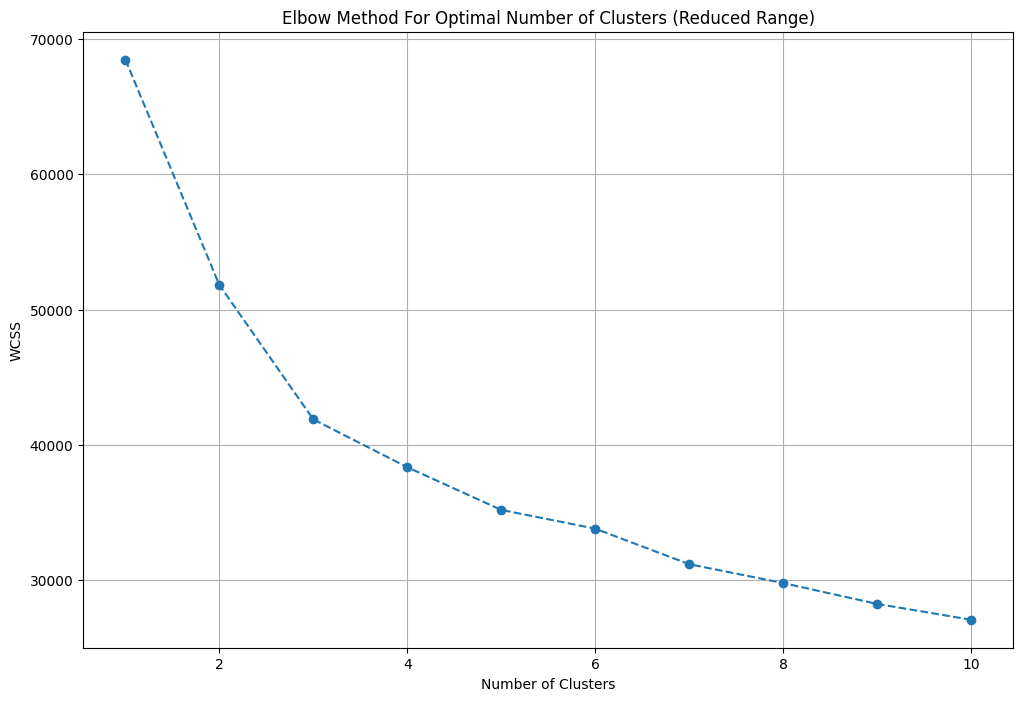

In [42]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [43]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [44]:
df = df.iloc[:,:-18]

In [45]:
df['furnishing_type'] = cluster_assignments

In [46]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
2331,"['1 Water Purifier', '1 Fridge', '1 Fan', '1 Exhaust Fan', '1 Geyser', '1 Light', '1 Modular Kitchen', '1 Chimney', '1 AC', '1 Curtains', '1 Wardrobe', 'No Bed', 'No Dining Table', 'No Microwave', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']",0
853,"['6 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",2
2721,"['4 Fan', '4 Light', '3 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",2
568,NaN,2
271,NaN,2


##5.features

In [47]:
df[['society','features']].sample(5)

,society,features
633,nul,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Centrally Air Conditioned', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
1951,mapsko royale ville,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']"
680,m3m soulitude,NaN
3504,vipul lavanya,"['Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
2109,tulip white,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"


In [48]:
df['features'].isnull().sum()

635

In [50]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [51]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [52]:
temp_df = df[df['features'].isnull()]

In [53]:
temp_df.shape

(635, 26)

In [54]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [55]:
df.loc[temp_df.index,'features'] = x.values

In [56]:
df['features'].isnull().sum()

481

In [57]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [58]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [59]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
2402,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
1557,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
2918,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3210,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3546,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [60]:
features_binary_df.shape

(3803, 130)

In [61]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

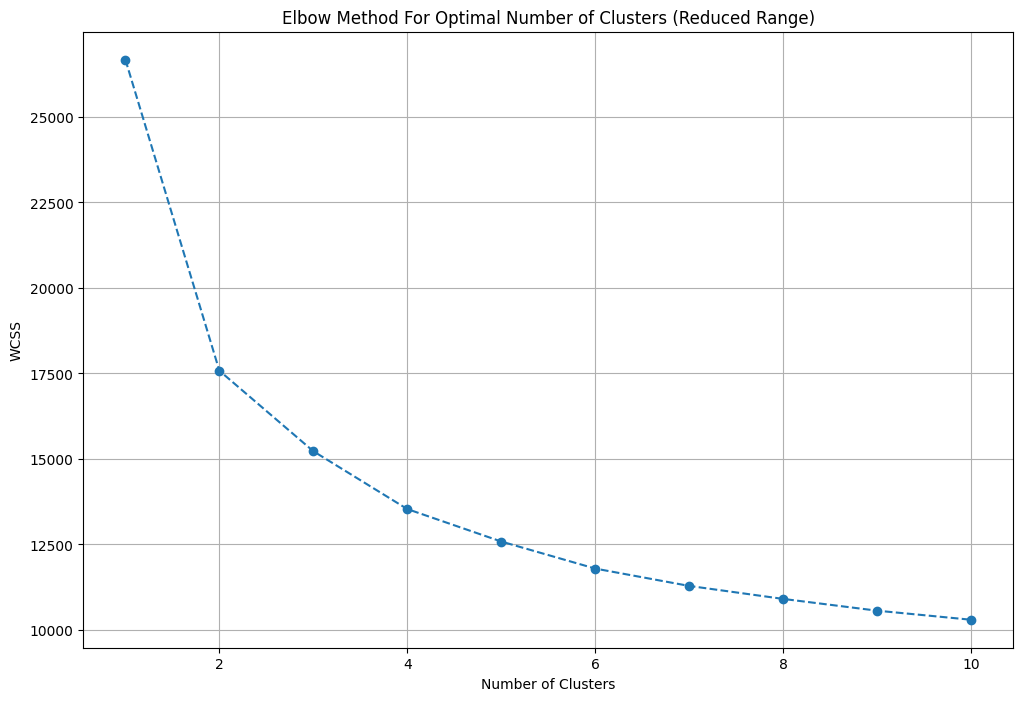

In [62]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [63]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [64]:
df['luxury_score'] = luxury_score

In [65]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,suncity vatsal valley,gwal pahari,1.38,9650.0,1430.0,Super Built up area 1430(132.85 sq.m.),3,3,2,not available,1.0,East,Relatively New,"['Sector 55-56 Metro Station', 'Banjara Market Gurugram', 'Central Plaza Mall', 'Faridabad - Gurgaon Road', 'Badshahpur Sohna Rd Hwy', ""Lingaya's Lalita Devi Institute"", 'Unicosmos School', 'Sushant University', 'Paras Hospitals, Gurgaon', 'Indira Gandhi Intl Airport', 'Gurgaon Railway Station', 'ASF Insignia SEZ']","['3 Wardrobe', '4 Fan', '1 Microwave', '10 Light', '2 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1430.0,NaN,NaN,0,0,0,0,0,0,"[Centrally Air Conditioned, Security / Fire Alarm, Feng Shui / Vaastu Compliant, Private Garden / Terrace, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Water Storage, No open drainage around, Bank Attached Property, Piped-gas, Internet/wi-fi connectivity, Recently Renovated, Visitor Parking, Park, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Low Density Society, Waste Disposal, Rain Water Harvesting, Water softening plant, Shopping Centre, Fitness Centre / GYM, Club house / Community Center]",151
1,house,independent,sector 25,10.00,37037.0,2700.0,Plot area 300(250.84 sq.m.),5,6,3,"store room,servant room",3.0,North,Old Property,"['Vodafone belvedere towers metro station', 'Dlf phase 2 metro station', 'Dlf phase 3 metro station', 'Indusind bank cyber city metro station', 'Sikandarpur metro station', 'Shri Shiv Shakthi Mandir', 'Jain Bhawan', 'Arya Samaj Mandir', 'Central bank atm teste 001112', 'Central bank ATM', 'Kotak mahindra ATM', 'Citibank ATM', 'Abn amro bank ATM', 'Axis bank ATM', 'Surgi Center Clinic', 'Kailash Nursing Home Gurgaon', 'RBS Dental Clinic', 'Cosmodentz Dental Clinic', 'Uma Sanjeevani Health Centre And Hospital', 'Relief Physiotherapy Clinic', 'Darpan Skin & Mind Clinic', 'Durga Poly Clinic', 'Krishna Family Clinic', 'Guardian', '98.4', 'Religare Wellness', 'Shri Balaji Medical Store', 'DLF Cyber City Phase II', 'Emaar Business Park', 'Standard chartered bank', 'Icici bank', 'Deutsche bank', 'Hsbc bank', 'Kotak mahindra bank', 'Axis bank', 'PVR Cinames', 'Mukesh Dhaba', 'Mc Donalds', ""McDonald's"", 'Food Court', 'The God Father', 'Cantine', 'barrique', 'American Montessori']","['1 Water Purifier', '7 Fan', '1 Exhaust Fan', '6 Geyser', '25 Light', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Park', 'Visitor Parking', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting']",NaN,300.0,NaN,0,1,1,0,0,0,"[Feng Shui / Vaastu Compliant, Private Garden / Terrace, Maintenance 

In [66]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [67]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1793,flat,dlf city plots phase 3,sector 24,6.50,18571.0,3500.0,Carpet area: 3500 (325.16 sq.m.),4,5,3+,3.0,North-East,New Property,NaN,NaN,3500.0,0,1,0,0,0,1,42
3485,flat,ramprastha the edge towers,sector 37d,0.80,8888.0,900.0,Super Built up area 1380(128.21 sq.m.)Built Up area: 1310 sq.ft. (121.7 sq.m.)Carpet area: 900 sq.ft. (83.61 sq.m.),2,2,3,10.0,South-East,Relatively New,1380.0,1310.0,900.0,0,0,0,0,1,2,166
3761,flat,signature global solera,sector 107,0.36,6581.0,547.0,Carpet area: 547 (50.82 sq.m.),2,2,2,8.0,South-East,Relatively New,NaN,NaN,547.0,0,0,0,0,0,2,45
835,flat,mvn athens,sohna road,0.21,4666.0,450.0,Carpet area: 450 (41.81 sq.m.),1,1,1,11.0,NaN,New Property,NaN,NaN,450.0,0,0,0,0,0,2,16
286,house,independent,sector 50,13.20,27155.0,4861.0,Built Up area: 4861 (451.6 sq.m.),6,6,0,2.0,NaN,Undefined,NaN,4861.0,NaN,0,0,0,0,0,2,0


In [68]:
df.shape

(3803, 23)

In [69]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)